In [3]:
import datetime as dt
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [4]:
# Step 1: Data Collection
start_date = dt.datetime(2021, 1, 1)
end_date = dt.datetime(2024, 3, 14)
ticker_symbol = 'NVDA'  # NVIDIA (NVDA) 輝達

In [5]:
# Fetch historical stock price data using Yahoo Finance API
stock_data = yf.download(ticker_symbol, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
# Step 2: Data Preprocessing
# Assuming data cleaning is done here (handling missing values, etc.)
# Assuming adjusting for stock splits is not necessary for Yahoo Finance data

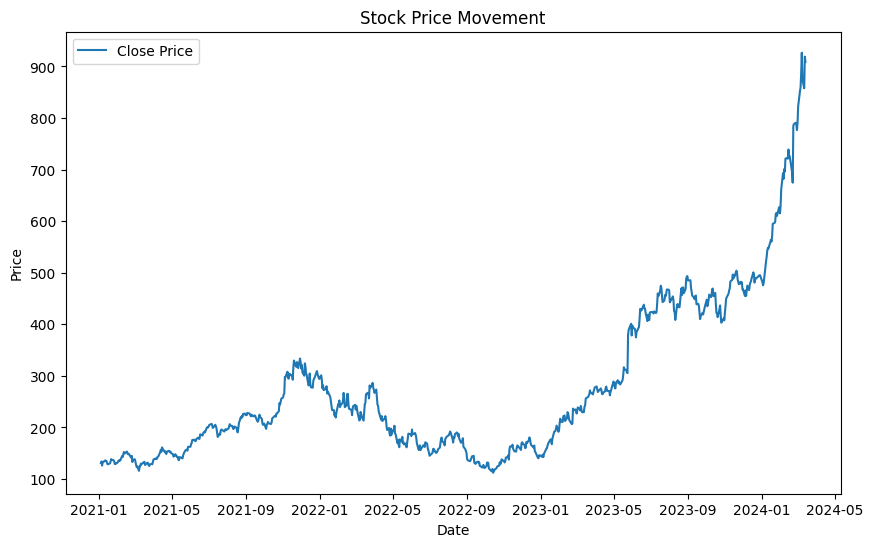

In [7]:
# Step 3: Exploratory Data Analysis (EDA)
# Visualize stock price movements 股價走勢圖
plt.figure(figsize=(10, 6))
plt.plot(stock_data.index, stock_data['Close'], label='Close Price')
plt.title('Stock Price Movement')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

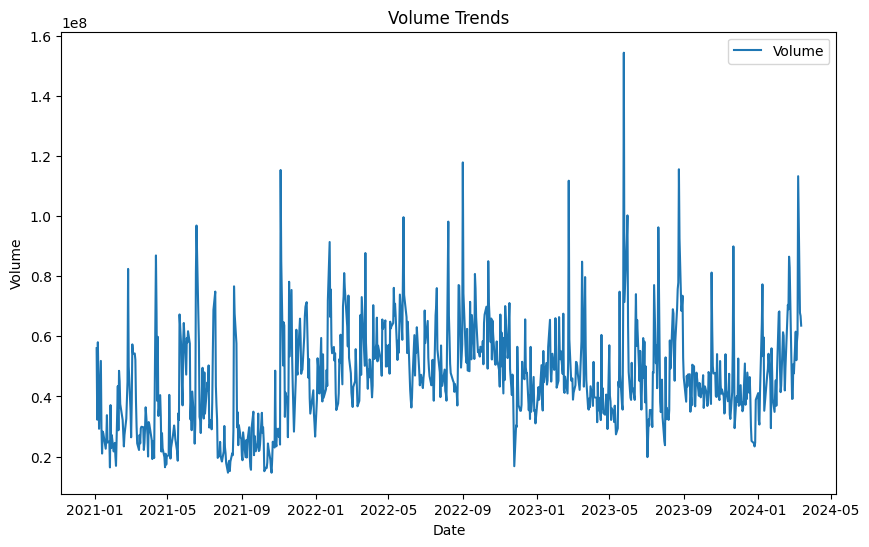

In [8]:
# Visualize volume trends 交易量變化圖
plt.figure(figsize=(10, 6))
plt.plot(stock_data.index, stock_data['Volume'], label='Volume')
plt.title('Volume Trends')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

In [9]:
# Step 4: Feature Engineering
# Calculate 50-day and 200-day moving averages
stock_data['MA50'] = stock_data['Close'].rolling(window=50).mean()
stock_data['MA200'] = stock_data['Close'].rolling(window=200).mean()

# Drop rows with missing values (due to rolling means)
stock_data.dropna(inplace=True)

# Split data into features and target variable
X = stock_data.drop(['Close', 'Adj Close'], axis=1)  # Features (excluding Close and Adj Close)
y = stock_data['Close']  # Target variable

In [10]:
# Step 5: Model Building
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)

In [11]:
# Step 6: Hyperparameter Tuning
# Define hyperparameters grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Initialize Random Forest model with best parameters
best_rf_model = RandomForestRegressor(**best_params, random_state=42)
best_rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=300, random_state=42)

In [12]:
# Step 7: Model Evaluation
# Predict on test data
y_pred = best_rf_model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 69.21256390860688


In [ ]:
# MSE 的值越小，說明預測模型描述實驗資料具有更好的精確度

In [13]:
# Step 8: Prediction
# Example: Predicting stock price for the next day
latest_data = X.iloc[-1].values.reshape(1, -1)
predicted_price = best_rf_model.predict(latest_data)
print("Predicted Price for Next Day:", predicted_price[0])

Predicted Price for Next Day: 893.4952016194661


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
